Linear Regression Use Case

In this given task, you will be asked to model the median home price of various houses across U.S. Census tracts in the city of Boston. This is a probable use case: We are predicting a continuous, numeric output (price) based on a combination of discrete features.

In [2]:
import matplotlib.pyplot as plt

% matplotlib inline

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.datasets import load_boston

boston = load_boston()

X = pd.DataFrame(boston.data,
                 columns=boston.feature_names)
y = pd.DataFrame(boston.target,
                 columns=['MEDV'])

print(boston['DESCR'])

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

<font size="5">Clean Up Data and Perform Exporatory Data Analysis</font>

Boston data is from scikit-learn, so it ought to be pretty clean, but we should always perform exploratory data analysis.

In [4]:
# Exploratory data analysis.

# Include: total nulls, index, data types, shape, summary statistics, and the number of unique values for each column

In [5]:
# looking at the predictive attributes dataframe

boston_data = pd.DataFrame(boston.data,columns=boston.feature_names)

In [6]:
boston_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [7]:
# adding the target attribute to the predictive attributes so i can look at the whole data set together and do EDA

boston_data['MEDV'] = boston.target

In [8]:
boston_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [9]:
# checking the shape (rows and columns) of the dataframe

boston_data.shape

(506, 14)

In [10]:
# checking the number of nulls in each column.  There are no nulls in any of the 14 attributes.  

boston_data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [11]:
# find the name of the index.  There is none and there is no unique id in any 14 attributes so will use default index given.

print(boston_data.index.name)

None


In [12]:
# find the datatypes of each column, they are all float.

pd.DataFrame(boston_data.dtypes, columns= ['Data_Types'])

,Data_Types
CRIM,float64
ZN,float64
INDUS,float64
CHAS,float64
NOX,float64
RM,float64
AGE,float64
DIS,float64
RAD,float64
TAX,float64


In [13]:
# checking the number of unique values for rach column.

boston_data.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
MEDV       229
dtype: int64

In [14]:
# Look at the summary statistics for each attribute

boston_data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [15]:
# want to transpose to look at the same sumary stats but transposed.  This makes it a little easier for me to compare. 

boston_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.593761,8.596783,0.00632,0.082045,0.25651,3.647423,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


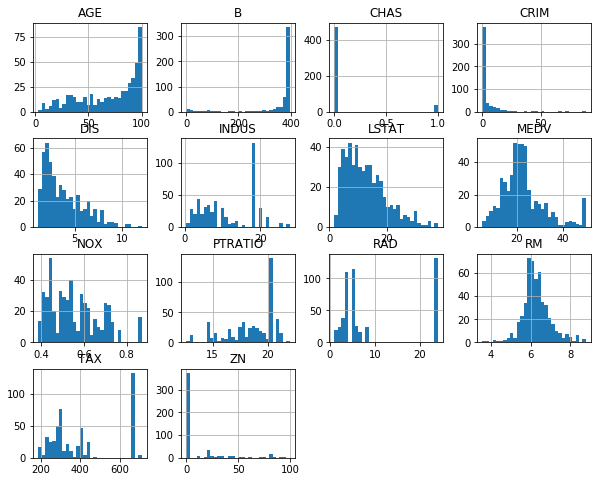

In [16]:
# want to look at the distrobution of the attributes so i know if i am dealing with a skewed or regualr distrobution.

boston_data.hist(figsize=(10,8),bins=30);

In [17]:
# i know that i am going to be predicting MEDV i want to see how everything is correlated to MEDV as well as other attributes.

boston_data.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.199458,0.404471,-0.055295,0.417521,-0.219940,0.350784,-0.377904,0.622029,0.579564,0.288250,-0.377365,0.452220,-0.385832
ZN,-0.199458,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.404471,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055295,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.417521,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219940,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.350784,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.377904,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.622029,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.579564,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


<font size="5">Using scikit-learn Linear Regression 

2. Pick 3-4 predictors (i.e. CRIM, ZN, etc...) that you will use to predict our target variable, MEDV.</font>

Score and plot your predictions. What do these results tell us?

In [18]:
# import linear regression and train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split

# create a list of features.  Chose these 4 attribues as my predictors because they seemed to have a strong correlation from
#the .corr() chart. 

feature_cols = ['LSTAT', 'RM', 'PTRATIO','DIS']

# create x and y

x = boston_data[feature_cols]
y = boston_data.MEDV

# assign variables to the test_split

x_train, x_test, y_train,y_test = train_test_split(x,y,random_state=99)


#instantiate 

linreg=LinearRegression()

# fit the model

linreg.fit(x_train,y_train)

# print the intercept and coeffecients 

print (f"Intercept: {linreg.intercept_}")
list(zip(feature_cols, linreg.coef_))

Intercept: 28.653313560231112


C:\Users\robbu\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


[('LSTAT', -0.71338238994140557),
 ('RM', 3.934349764746476),
 ('PTRATIO', -1.0601893363389245),
 ('DIS', -0.65240902797814893)]

In [19]:
# score the model

linreg.score(x_test,y_test)

0.61624210096993348

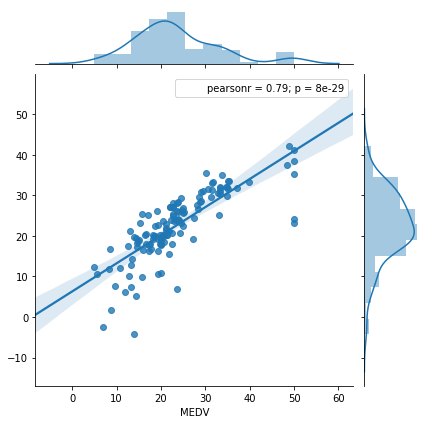

In [20]:
# make predictions based off the model and plot those predictions

y_pred = linreg.predict(x_test)

sns.jointplot(y_test, y_pred,kind='reg');

# this is showing that there is a medium-high correlation between the predictor attributes and MEDV.  
# the low p_value shows strong significance.

<font size="5">3. Try 70/30 and 90/10 train/test splits (70% of the data for training - 30% for testing, then 90% for training - 10% for testing)</font>

Score and plot. How do your metrics change? What does this tell us about the size of training/testing splits?

In [21]:
# import linear regression and train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split


feature_cols = ['LSTAT', 'RM', 'PTRATIO','DIS']

# create x and y

x = boston_data[feature_cols]
y = boston_data.MEDV

# assign variables to the test_split, using the same randm_state, only this time maaking the 70/30 split

x_train, x_test, y_train,y_test = train_test_split(x,y,train_size = .7,random_state=99)

#instantiate 

linreg=LinearRegression()

# fit the model

linreg.fit(x_train,y_train)

# print the intercept and coeffecients 

print (f"Intercept: {linreg.intercept_}")
list(zip(feature_cols, linreg.coef_))

Intercept: 28.964935107991725


[('LSTAT', -0.7530672559028887),
 ('RM', 3.9086463336674062),
 ('PTRATIO', -1.0374717430219975),
 ('DIS', -0.67138348879056575)]

In [22]:
# score the model.  This model as a slightly lower score than the original.  So by shrinking the 
# train size from .75 to .7 our model got a little less effective.

linreg.score(x_test,y_test)

0.6030791775196418

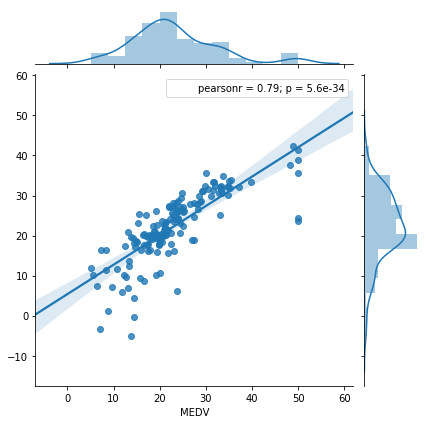

In [23]:
# make predictions based off the model and plot those predictions

y_pred = linreg.predict(x_test)

sns.jointplot(y_test, y_pred,kind='reg');

# this is showing that there is a medium-high correlation between the predictor attributes and MEDV.  
# THis graph looks almost identical to the .7 train test split.  This model is very similiar to the first model.

In [24]:
# import linear regression and train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split


feature_cols = ['LSTAT', 'RM', 'PTRATIO','DIS']

# create x and y

x = boston_data[feature_cols]
y = boston_data.MEDV

# assign variables to the test_split, using the same randm_state, only this time maaking the 90/10 split

x_train, x_test, y_train,y_test = train_test_split(x,y,train_size = .9,random_state=99)

#instantiate 

linreg=LinearRegression()

# fit the model

linreg.fit(x_train,y_train)

# print the intercept and coeffecients 

print (f"Intercept: {linreg.intercept_}")
list(zip(feature_cols, linreg.coef_))

Intercept: 24.386367800736267


[('LSTAT', -0.68769142656126991),
 ('RM', 4.3099587802018728),
 ('PTRATIO', -0.97461872598729904),
 ('DIS', -0.60841716030797255)]

In [25]:
# score the model.  This model is a higher score than the original.  So by increasing the 
# train size from .75 to .9 our model got a little more effective.

linreg.score(x_test,y_test)

0.67375967388702929

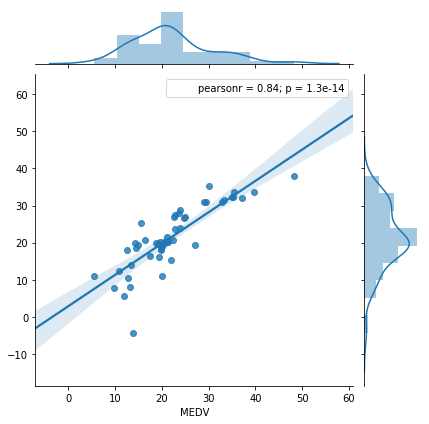

In [26]:
# make predictions based off the model and plot those predictions

y_pred = linreg.predict(x_test)

sns.jointplot(y_test, y_pred,kind='reg');

# this is showing that there is still a medium-high correlation between the predictor attributes and MEDV but a little stronger
# than the original. This model is similiar to the first  two models but the correlation is stronger.  
# This tells us that when we were able to test more data, we were more effective in predicting MEDV based off these 
# 4 attributes.  


<font size="5">4. Use k-fold cross validation varying the number of folds from 5 to 10</font>

What seems optimal? How do your scores change? What is the variance like? Try different folds to get a sense of how this impacts your score. What are the tradeoffs associated with choosing the number of folds?

In [27]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

# set the feature columns again just to confirm

feature_cols = ['LSTAT', 'RM', 'PTRATIO','DIS']

# create x and y

x = boston_data[feature_cols]
y = boston_data.MEDV

# iterate through folds 5-10
for folds in range(5,11):
    print('----------------------------\n')
    print('K: {}'.format(folds))
    model = LinearRegression()
    
    # Perform cross-validation
    scores = cross_val_score(model, x, y, cv=folds)
    print("Cross-validated scores: {}".format(scores))
    print("Mean CV R2: {}".format(np.mean(scores)))
    print('Std CV R2: {}'.format(np.std(scores)))
    
    # Make cross-validated predictions
    predictions = cross_val_predict(model, x, y, cv=folds)
    
    r2 = metrics.r2_score(y, predictions)
    print("Cross-Predicted R2: {}".format(r2))
    
# It is tough to decipher which which fold is optimal.  Out of all folds k:8 has this highest cross-predicted R2 score.
# This means that over 61% of the data is explained by the regression.  
# As the folds increase, it seems the Mean CV R2 decreases and the STD CV R2 increases.  The Cross Predicted looks to slightly
# increase but then plateau.  This looks like as the folds increase the variance also increases.  So the trade-off would be
# that as we increase folds we can test more data and might get slightly more accurate, but also our variance increases. 

----------------------------

K: 5
Cross-validated scores: [ 0.70527478  0.68227763  0.57737735  0.20721489 -0.1306542 ]
Mean CV R2: 0.40829808993820504
Std CV R2: 0.32334246971436803
Cross-Predicted R2: 0.5917820600016324
----------------------------

K: 6
Cross-validated scores: [ 0.68838388  0.65165573  0.52311851  0.75399065  0.03753486  0.00609768]
Mean CV R2: 0.4434635505935
Std CV R2: 0.3060961022429489
Cross-Predicted R2: 0.5821613947294998
----------------------------

K: 7
Cross-validated scores: [ 0.69488959  0.62058508  0.56741131  0.65221061  0.45592511 -0.09868059
  0.22479484]
Mean CV R2: 0.44530513474539074
Std CV R2: 0.2660271990615951
Cross-Predicted R2: 0.5813623614840548
----------------------------

K: 8
Cross-validated scores: [ 0.7225819   0.57534891  0.66389346  0.59454871  0.73855229 -0.19206985
 -0.89451572  0.23346044]
Mean CV R2: 0.3052250177384418
Std CV R2: 0.5407295560893242
Cross-Predicted R2: 0.6166097429456621
----------------------------

K: 9
Cross-v

<font size="5">KNN Practice</font>

In [28]:
# Read the iris data into a DataFrame
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

col_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
iris = pd.read_csv(url, header=None, names=col_names)

In [29]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [30]:
# Increase the default figure and font sizes for easier viewing
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

In [31]:
# Create a custom colormap
from matplotlib.colors import ListedColormap

cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

In [32]:
# Map each iris species to a number
# Let's use Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2 and create a column called 'species_num'

iris['species_num'] = iris.species.map({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2})

iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_num
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


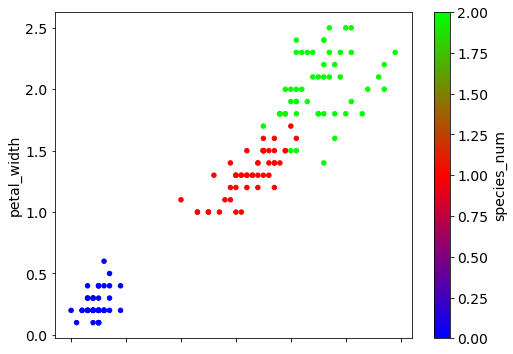

In [36]:
# Create a scatterplot of PETAL LENGTH versus PETAL WIDTH and color by SPECIES
iris.plot(kind='scatter', x='petal_length', y='petal_width', c='species_num', colormap='brg');

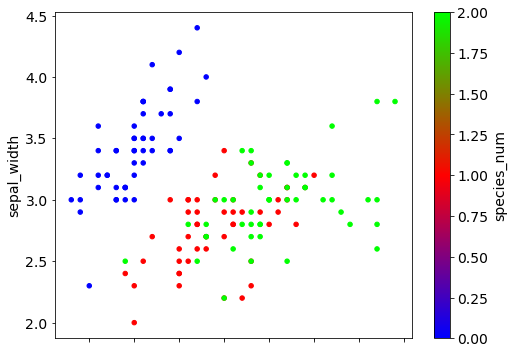

In [170]:
# Create a scatterplot of SEPAL LENGTH versus SEPAL WIDTH and color by SPECIES
iris.plot(kind='scatter', x='sepal_length', y='sepal_width', c='species_num', colormap='brg');

<font size="5">KNN Classification of the Iris Dataset</font>

<font size="3">Create your feature matrix "X"</font>

This will be all species measurements (sepal length, petal width, etc...)

In [171]:
# set the feature columns again just to confirm

feature_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

# create x and y

x = iris[feature_cols]

<font size="5">Create your target vector "y"</font>

This will be the species type

In [172]:
y = iris.species

<font size="5">Make Use of Train-Test-Split</font>

Split your data in to train and test sets.

In [173]:
# importing train_test_splie


from sklearn.model_selection import train_test_split
from sklearn import metrics

In [174]:
# splitting into x and y.  using random_state 23 for reproductibility

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=23)

<font size="5">Import KNN From scikit-learn and Instatiate a Model With One Neighbor</font>

In [176]:
# importing knn from sklean
from sklearn.neighbors import KNeighborsClassifier

# instantiating and training the set with one neighbor

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

<font size="5">Check the Accuracy</font>

Train your model using the training set then use the test set to determine the accuracy

In [177]:
# trained the model with the training set above.  Now testing it and checking the accuracy below

y_pred = knn.predict(x_test)
print((metrics.accuracy_score(y_test, y_pred)))

0.973684210526


<font size="5">Create a Model With Five Neighbors. Did it Improve?</font>

In [178]:
# splitting into x and y.  using random_state 23 for reproductibility

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=23)

# instantiating and training the set with 5 neighbors

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

# trained the model with the training set above.  Now testing it and checking the accuracy below

y_pred = knn.predict(x_test)
print((metrics.accuracy_score(y_test, y_pred)))

# this imporoved the accuracy from about 97% to 100%

1.0


<font size="5">Create a Looped Function That Will Check All Levels of Various Neighbors and Calculate the Accuracy</font>

In [179]:
# importing train_test_split, metrics, and knn


from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

# splitting into x and y.  using random_state 23 for reproductibility

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=23)

# iterate through range of 1 through 38 since you cant have more neighbors than the len(x_test) which is 38.  Then predicting and
# printing the accuracy score for each k.
for neighbors in range(1,39):
    print('----------------------------\n')
    print('K: {}'.format(neighbors))
    knn = KNeighborsClassifier(n_neighbors=neighbors)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    print((metrics.accuracy_score(y_test, y_pred)))   

----------------------------

K: 1
0.973684210526
----------------------------

K: 2
0.973684210526
----------------------------

K: 3
0.973684210526
----------------------------

K: 4
0.973684210526
----------------------------

K: 5
1.0
----------------------------

K: 6
0.973684210526
----------------------------

K: 7
1.0
----------------------------

K: 8
1.0
----------------------------

K: 9
1.0
----------------------------

K: 10
0.973684210526
----------------------------

K: 11
1.0
----------------------------

K: 12
1.0
----------------------------

K: 13
1.0
----------------------------

K: 14
1.0
----------------------------

K: 15
1.0
----------------------------

K: 16
1.0
----------------------------

K: 17
1.0
----------------------------

K: 18
1.0
----------------------------

K: 19
1.0
----------------------------

K: 20
1.0
----------------------------

K: 21
0.973684210526
----------------------------

K: 22
0.947368421053
----------------------------

K: 23
0.973

<font size="5">Bonus: According to scikit-learn Documentation, What is knn.predict_proba(X_new) Going to Do?</font>

In [129]:
# it will return the probability estimates for the test data x